##### **System design and implementation with a testing augmentation (e.g. dummy augmentation that outputs the same image as the input one).**
#### **Specification:**
#### Using Python and OpenCV write a program that:
- Allows user to select a directory on local disk. (e.g. using tkinter library)
- Read all .jpg images from this directory and, for each of them, apply a set of predefined augmentation algorithms with a set of predefined parameters. (e.g. Rotation with +15 degree).
- The augmentation algorithms names (only "dummy" for this stage) and corresponding parameters values to be applied will be loaded when the program starts from a configuration file (plain text, xml etc.)
- The results of augmentation process will be saved on a new directory (output dir), having the same name with the original one plus the "_aug" suffix.
- Each augmented image will be saved in the output dir having the name of augmentation algorithm as suffix followed by an incremental number starting with "_1".<br/>  
*For extra-points to the project evaluation please implement also support for chain of processing (e.g. contrast adjustment followed by resize in one processing step). The configuration language should be modified to allow specification of multiple operation per line, together with their configuration parameters.*<br/>
The project will be evaluated to a maximum of 30p with 10p extra for the chain processing.<br/>
#### Supplementary readings:
[1] Shorten, C., Khoshgoftaar, T.M. A survey on Image Data Augmentation for Deep Learning. J Big Data 6, 60 (2019). https://doi.org/10.1186/s40537-019-0197-0<br/>
[2] Pandey - Overview of popular Image Augmentation packages (2020).<br/>  
<br/>  
<br/>  
<br/>  
<br/>

### Importing the useful libraries

In [65]:
import os
import cv2
import math
import json
import numpy as np
import matplotlib.pyplot as plt
import tkinter.font as font
from math import sqrt
from tkinter import *
from tkinter import filedialog

### Image processing algorithms
First and foremost, we load a picture whichi will be used as a sample for the image processing algorithms that I will illustrate.

In [66]:
image = cv2.imread('./test/ATLAS-OF-PLACES-LARS-VON-TRIER-MELANCHOLIA-IMG-1.jpg')

Display the original image here:

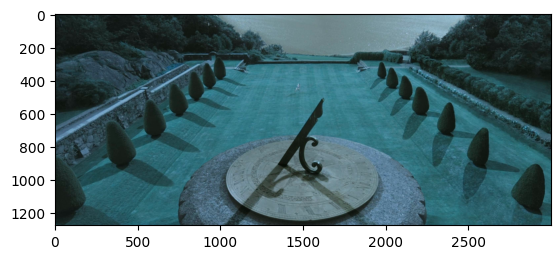

In [67]:
plt.imshow(image)
plt.show()

#### Color transformations

##### Brightness
The brightness of a pixel is given by the sum of its RGB values. In order to modify the brightness of a pixel without altering its relative shade with respect to the rest of the pixels from the image it belongs to it is necessary to keep constant the proportionality between the RGB channels. Thus, in order to modify the brightness I multiplied with the same scalar all the elements of the RGB array for each pixel within the sample image.<br/>  
The functions takes two parameters, the image to be processed as an array and a percetange wich reprezents the brightness of the new image with respect to the original image's one.

Function code:

In [68]:
def brightness(image,brightness):
    new_img = image*np.full(image.shape,brightness/100)
    return new_img

Creating the new image:

In [69]:
cv2.imwrite('./sample_test/experiment1.jpg',brightness(image,200))

True

Display the new image here:

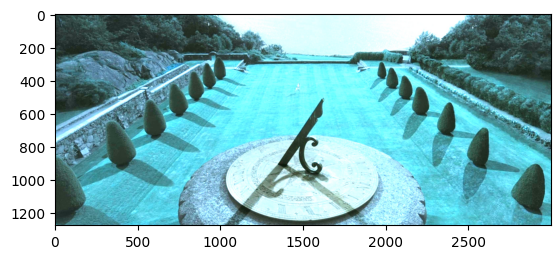

In [70]:
tmp = cv2.imread('./sample_test/experiment1.jpg')
plt.imshow(tmp)
plt.show()

##### Grayscale
In order to receive from a color image its grayscale equivalent each pixel must keep its brightness, but it also must have all the RGB values identical. Therefore, I replaced for each pixel each of its RGB values with the arithmetic mean of its RGB values.<br/>  
The function takes one parameter, the image to be processed as an array.

Function code:

In [71]:
def grayscale(image):
    new_img = np.expand_dims(np.average(image,axis=2),axis=2)
    new_img = np.dstack((new_img,new_img,new_img))
    return new_img

Creating the new image:

In [72]:
cv2.imwrite('./sample_test/experiment2.jpg',grayscale(image))

True

Display the new image here:

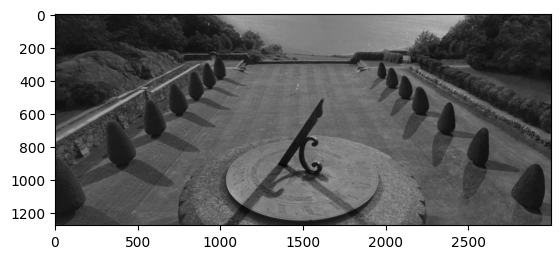

In [73]:
tmp = cv2.imread('./sample_test/experiment2.jpg')
plt.imshow(tmp)
plt.show()

##### Negative
The negative of an image is the image obtained by reversing the color intensities frim the original image. This could be achieved by replacing each RGB value within each pixel with its 255’s complement, where 255 represents the maximum intensity of a color.<br/>  
The funciton takes one parameter which represents the image to be processed as an array.

Function code:

In [74]:
def negative(image):
    new_img = np.full(image.shape,255) - image
    return new_img

Creating the new image:

In [75]:
cv2.imwrite('./sample_test/experiment3.jpg',negative(image))

True

Display the new image here:

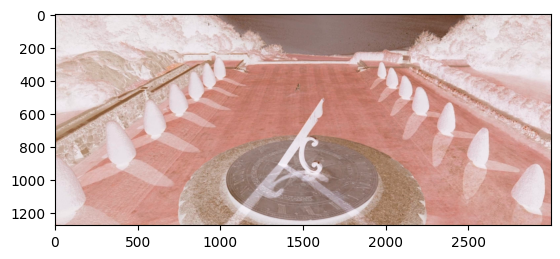

In [76]:
tmp = cv2.imread('./sample_test/experiment3.jpg')
plt.imshow(tmp)
plt.show()

##### Color filter
The color filter can either amplify or mitigate some specific colors within an image. The function receives as parameters the image to be processed as an array and a list with 3 elements, one for each RGB value in this order. Each element from the list represents the percent with which the corresponding color should be amplified. Therefore, if the percent is less than 100, the color will be mitigated, otherwise, the color will become brighter.

Function code:

In [77]:
def color(image,colors):
    colors.reverse()
    new_img = np.zeros(image.shape)
    colors = np.divide(colors,100).astype(int)
    new_img = image*colors
    return new_img

Crearting the new image:

In [78]:
cv2.imwrite('./sample_test/experiment4.jpg',color(image,[0,100,0]))

True

Display the new image here:

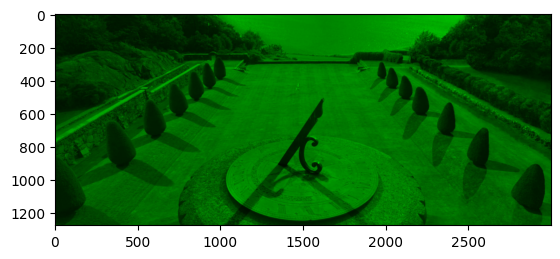

In [79]:
tmp = cv2.imread('./sample_test/experiment4.jpg')
plt.imshow(tmp)
plt.show()

##### Median filter
The median filter replaces each pixel’s RGB channel with the median of the neighboring pixels’ values, acting upon each of the RGB value independently. In this case, the neighboring of a pixel designates a square matrix which is extracted form the original image. The upper left corner of the matrix is the current pixel. We may notice that for each pixel this matrix changes its elements by traversing through the entire image, pixel by pixel, as if it sweeps the whole picture. From now, we will call this matrix “sliding window”. Also, we will use the same name for this technique. In order to be able to apply this technique we must pad the original image in both the right and the bottom sides with a number of arrays equal with the sliding window’s dimension minus one. We have to do this in order to be able to traverse the entire picture up to its edges.<br/>  
The median filter acts like a low-pass filter since the pixels with relative high color intensity will be faded while the pixels with relative low color intensity will become brighter.<br/>  
The function receives as parameters the image as an array and a number which represents the sliding window’s dimension.

Function code:

In [80]:
def median(image,kernel_size):
    new_img = np.zeros(image.shape)
    padded = np.pad(image,((0,kernel_size-1),(0,kernel_size-1),(0,0)))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_img[i,j] = np.median(padded[i:i+kernel_size,j:j+kernel_size],axis=(0,1))
    return new_img

Creating the new image:

In [81]:
#cv2.imwrite('./sample_test/experiment5.jpg',median(image,50))

Display the new image here:

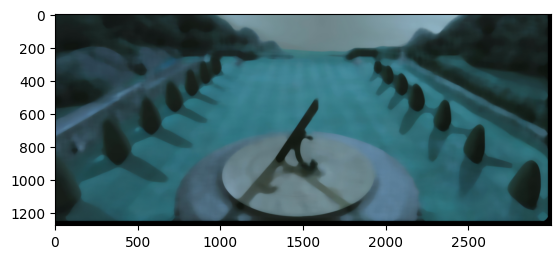

In [82]:
tmp = cv2.imread('./sample_test/experiment5.jpg')
plt.imshow(tmp)
plt.show()

##### Smooth filter
Similarly to median filter, smoothing filter also implements the sliding window technique, except that each pixel from the new image represents the arithmetic mean of the values from the window. This behavior makes the smoothing filter a low-pass filter too, and the resulted image seems defocused. This process is well-known as “blur”.<br/>
The function receives as parameters the image as an array and a number which represents the sliding window’s dimension.

Function code:

In [83]:
def smooth(image,kernel_size):
    new_img = np.zeros(image.shape)
    padded = np.pad(image,((0,kernel_size-1),(0,kernel_size-1),(0,0)))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_img[i,j] = np.average(padded[i:i+kernel_size,j:j+kernel_size],axis=(0,1))
    return new_img

Creating the new image:

In [84]:
#cv2.imwrite('./sample_test/experiment6.jpg',smooth(image,30))

Display the new image here:

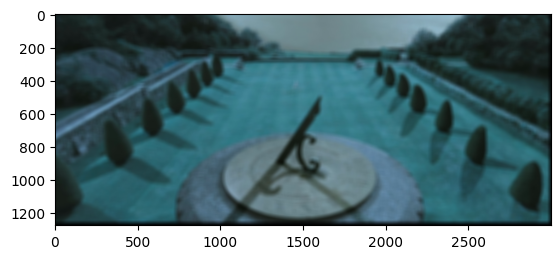

In [85]:
tmp = cv2.imread('./sample_test/experiment6.jpg')
plt.imshow(tmp)
plt.show()

##### Sharpening filter
Sharpening is an “opposed” procedure to smoothing, acting like a high-pass filter, thus, the intense colors are amplified, while faded colors are mitigated. As a result of this filter, the image becomes clearer. The technique which was used within this process is sliding window. The processed pixel represents (in this case) the center of the sliding window. The sliding window has the predetermined size of 3. In order to make possible to implement this algorithm it is necessary to pad the original image on all vertical and horizontal sides with only one array of elements. This time, we introduce the notion of kernel. The kernel is a predefined matrix which is multiplied elementwise with the current sliding window. Finally, the current pixel will store a value (for each color within the RGB channel) equal to the sum of the elements of the matrix which was previously computed by element-wise multiplication. This method is named convolution. If we analyze the values of the sharpening convolution kernel, we may notice that a modified pixel will have a bigger value whether its neighboring values are smaller with respect to its value and vice versa.<br/>  
The function takes one parameter which represents the image to be processed as an array.

Function code:

In [86]:
def sharpen(image):
    new_img = np.zeros(image.shape)
    padded = np.pad(image,((1,1),(1,1),(0,0)),'edge')
    kernel = np.expand_dims(np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]),axis=2)
    for i in range(1,padded.shape[0]-1):
        for j in range(1,padded.shape[1]-1):
            matrix = padded[i-1:i+2,j-1:j+2]*kernel
            new_img[i-1,j-1] = np.sum(matrix,axis=(0,1))
    return new_img

Creating the new image:

In [87]:
#cv2.imwrite('./sample_test/experiment7.jpg',sharpen(image))

Display the new image here:

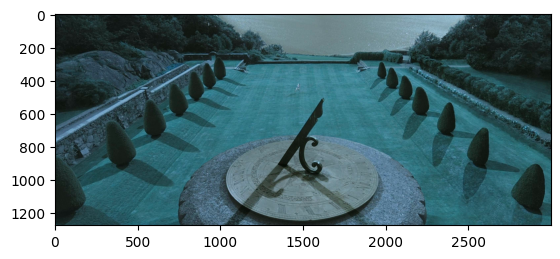

In [88]:
tmp = cv2.imread('./sample_test/experiment7.jpg')
plt.imshow(tmp)
plt.show()

##### Edge detection
The Sobel filter operates in a similar way to the sharpening filter. Therefore, the Sobel filter implements convolution with a 3x3 kernel, but, its values are chosen so that the next processed pixel will have a value which is the bigger in magnitude, the bigger the difference between the neighbor pixel values is.<br>  
There are two types of Sobel filters: one used for horizontal edge detection and another one used for vertical edge detection. In order to emphasize in a correct way the edges within a picture, it is mandatory to sum the values obtained from applying both the horizontal and vertical Sobel filters using addition. Consequently, we will use Pitagora’s theorem to compute the magnitude of the result. By using Pitagora’s theorem, we may notice that we do not have to deal with the signs of the horizontal and vertical components because those values will be squared. In order to avoid exhaustive details, it is recommended to apply a blur filter before the edge detection. Also, in order to receive picture in black and white we have to apply a grayscale filter before the edge detection.<br/>  
The function takes as the single parameter the image which will be processed as an array.

Function code:

In [89]:
def sobel(image):
    new_img = np.zeros(image.shape)
    horizontal_kernel = np.expand_dims(np.array([[-1,-2,-1],[0,0,0],[1,2,1]]),axis=2)
    vertical_kernel = np.expand_dims(np.array([[-1,0,1],[-2,0,2],[-1,0,1]]),axis=2)
    padded = np.pad(image,((1,1),(1,1),(0,0)),'edge')
    for i in range(1,padded.shape[0]-1):
        for j in range(1,padded.shape[1]-1):
            vertical = padded[i-1:i+2,j-1:j+2]*vertical_kernel
            horizontal = padded[i-1:i+2,j-1:j+2]*horizontal_kernel
            pixel_vertical = np.sum(vertical,axis=(0,1))
            pixel_horizontal = np.sum(horizontal,axis=(0,1))
            new_img[i-1,j-1] = np.sqrt(pixel_vertical*pixel_vertical + pixel_horizontal*pixel_horizontal)
    return new_img

Creating the new image:

In [90]:
#cv2.imwrite('./sample_test/experiment8.jpg',sobel(image))

Display the new image here:

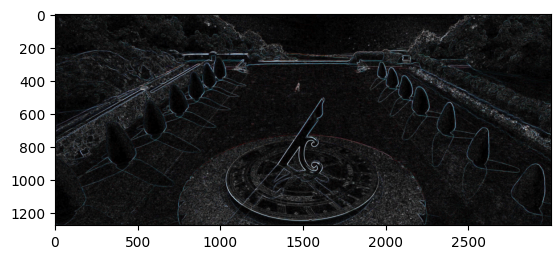

In [91]:
tmp = cv2.imread('./sample_test/experiment8.jpg')
plt.imshow(tmp)
plt.show()

#### Geometric transformations

##### Crop
This function takes 5 parameters and returns the cropped image. The first parameter represents the image to be processed, while the other parameters represent percent which designate the value of the X and Y coordinates of the image relative to the width and height of the picture, respectively. Therefore, the second parameter represents the X coordinate for the starting point of the crop, the third parameter represents the X coordinate for the ending point of the crop, the fourth parameter represents the Y coordinate for the starting point of thre crop and finally the fifth parameter represents the Y coordinate for the ending point of the crop. The crop's shape is rectangular, therefore, by "starting point" I mean the lower left corner of the image that will be cropped, while by "ending point" I mean the upper right corner of the image that will be cropped.

Function code:

In [92]:
def crop(image,x_start,x_end,y_start,y_end):
    new_img = np.array(image)
    h,w = new_img.shape[:2]
    if x_start < 0 or y_start < 0 or x_end > 100 or y_end > 100 or x_start >= x_end or y_start >= y_end:
        print('Incorrect parameters')
        return image.copy
    x_start = int(w*x_start/100)
    x_end = int(w*x_end/100)
    y_start = int(h*y_start/100)
    y_end = int(h*y_end/100)
    new_img = new_img[y_start:y_end,x_start:x_end]
    return new_img

Creating the new image:

In [93]:
tmp = cv2.imwrite('./sample_test/experiment9.jpg',crop(image,20,60,20,60))

Display the new image here:

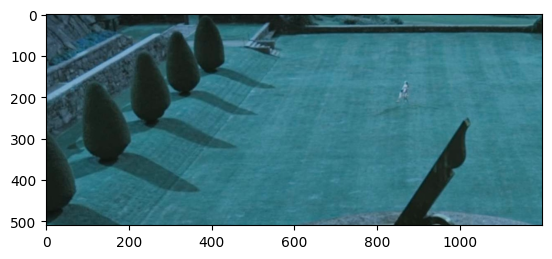

In [94]:
tmp = cv2.imread('./sample_test/experiment9.jpg')
plt.imshow(tmp)
plt.show()

##### Flip
In order to filp an image I used the slice operator with negative step. For horizontally flip we have to reverse the image about the X axis (0th list parameter), whilst for vertically flip we have to reverse the image about the Y axis (1st list parameter).

Function code:

In [95]:
def flip(image,parameter):
    new_image = np.array(image)
    if parameter == 'horizontally':
        new_image = new_image[::-1,:,:]
    if parameter == 'vertically':
        new_image = new_image[:,::-1,:]
    return new_image     

Creating the new image:

In [96]:
cv2.imwrite('./sample_test/experiment10.jpg',flip(image,'horizontally'))

True

Display the new image here:

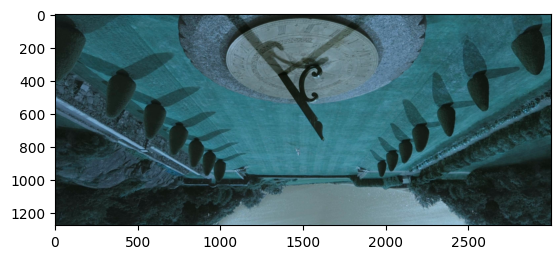

In [97]:
tmp = cv2.imread('./sample_test/experiment10.jpg')
plt.imshow(tmp)
plt.show()

##### Translate
This function takes 3 input parameters. The first one is the image which will be processed. The next two parameters represent the (X,Y) coordinate of the point where the upper left corner of the (new) image will be translated.<br/>  
In order to do this I created a new empty image which has the same shape as the original image (3D numpy array filled with 0s) and I copied the pixels from the original image to the new image, except that I shifted the coordinates so that the upper right corner was shifted to the (X,Y) position.

Function code:

In [98]:
def translate(image,x,y):
    h,w = image.shape[:2]
    image = np.array(image)
    new_img = np.zeros((h,w,3))
    if x < 0 or y < 0 or x > 100 or y > 100:
        print('Incorrect coordinates!')
        return new_img
    y = int(h*y/100)
    x = int(w*x/100)
    for i in range(y,h):
        for j in range(x,w):
            new_img[i,j] = image[i-y,j-x]
    return new_img

Creating the new image:

In [99]:
cv2.imwrite('./sample_test/experiment11.jpg',translate(image,20,40))

True

Display the new image here:

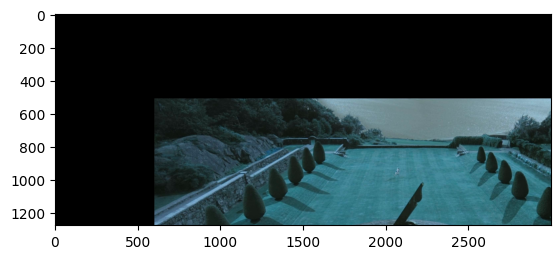

In [100]:
tmp = cv2.imread('./sample_test/experiment11.jpg')
plt.imshow(tmp)
plt.show()

##### Rotate

Function code:

In [101]:
def rotate(image, angle, x_center, y_center):
    h,w = image.shape[:2]
    new_img = np.zeros((h,w,3))
    if x_center < 0 or y_center < 0 or x_center > 100 or y_center > 100:
        print('The parameters are not normal percentages!')
        return new_img
    x_center = x_center*w/100
    y_center = y_center*h/100
    angle = angle*math.pi/180
    transform = np.array([[math.cos(angle), -math.sin(angle)],[math.sin(angle),math.cos(angle)]])
    for i in range(h):
        for j in range(w):
            center = np.array([y_center,x_center])
            coordinates = np.array([i,j])
            new_coordinates = transform @ (coordinates - center) + center
            [i_rotated,j_rotated] = new_coordinates.astype(int).tolist()
            if i_rotated > 0 and j_rotated > 0 and i_rotated < h and j_rotated < w:
                new_img[i_rotated,j_rotated] = image[i,j]
    return new_img

Create the new image:

In [102]:
#cv2.imwrite('./sample_test/experiment12.jpg',rotate(image,30,50,50))

Display the new image here:

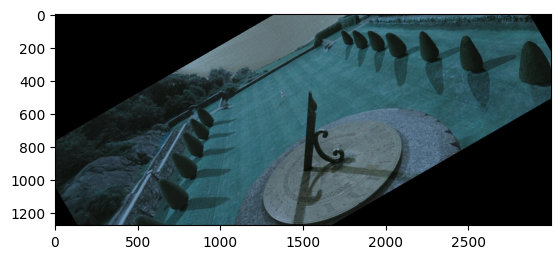

In [103]:
tmp = cv2.imread('./sample_test/experiment12.jpg')
plt.imshow(tmp)
plt.show()

##### Shear

Function code:

In [104]:
def shear(image,angles):
    angles = np.array(angles)
    vertical_shear = 1/math.tan(angles[0]*math.pi/180)
    horizontal_shear = 1/math.tan(angles[1]*math.pi/180)
    h,w = image.shape[:2]
    new_img = np.zeros((h,w,3))
    transform = np.array([[1,vertical_shear],[horizontal_shear,1]])
    for i in range(h):
        for j in range(w):
            coordinates = np.array([i,j])
            new_coordinates = transform @ coordinates
            [i_rotated,j_rotated] = new_coordinates.astype(int).tolist()
            if i_rotated > 0 and j_rotated > 0 and i_rotated < h and j_rotated < w:
                new_img[i_rotated,j_rotated] = image[i,j]
    return new_img

Creating the new image:

In [105]:
#cv2.imwrite('./sample_test/experiment13.jpg',shear(image,[30,30]))

Display the new image here:

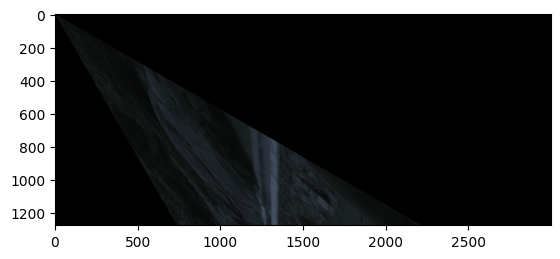

In [106]:
tmp = cv2.imread('./sample_test/experiment13.jpg')
plt.imshow(tmp)
plt.show()

### Creating a graphical user interface in order to be able to select the input directory
By using "tkinter" library we will create a graphical user interface which consists of a window which has two widgets: a label and a button. Both the label and the button contain a message that indicate the purpose of the GUI (selecting the input directory). If the user presses the button, then the (s)he will be able to select the directory that contains the pictures which will be processed from another popped up window.

In [107]:
def onClick():
    global filepath
    filepath = filedialog.askdirectory(initialdir='./',title='select directory')
    root.destroy()

root = Tk()
root.title('Main menu')
root.geometry('600x200')

widgetFont = font.Font(size=16, weight='bold')
myLabel = Label(root,text='Select the input directory, please.',font=widgetFont,padx=80,pady=20,bg='green')
myLabel.pack()
myButton = Button(root,text='Click here to select the input directory',font=widgetFont,padx=50,pady=20,bg='red',command=onClick)
myButton.pack()

root.mainloop()

print('The path of the input directory is: ' + filepath)

The path of the input directory is: C:/Users/Paul/Desktop/projCV/test


### Creating a directory for storing the augmented pictures
We will use the path received from the user and then we will check out if there is already a directory with that name. If it is not, we will create one, otherwise, we will delete the whole content of the existing directory in order to prepare it for storing only the output of this application and, in addition, we will print an appropiate message which acknowledges the user that the corresponding directory was cleaned up.

In [108]:
path = filepath
new_path = path + '_aug'
jpg_files = []
if not os.path.exists(new_path):
    os.mkdir(new_path)
else:    
    print('Direcotry ',new_path,' already created...')
    for i in os.listdir(new_path):
        if i[-4:] == '.jpg':
            os.remove(new_path + '\\' + i)

Direcotry  C:/Users/Paul/Desktop/projCV/test_aug  already created...


### Preparing the input files
Then, we will create a list which contains all the names of the files that are to be processed. In order to be sure that all the files were read correctly, we will print their names.

In [109]:
for i in os.listdir(path):
    if i[-4:] == '.jpg':
        jpg_files.append(path + '\\' + i)
print(jpg_files)

['C:/Users/Paul/Desktop/projCV/test\\1200px-Gaoliang_Bridge.jpg', 'C:/Users/Paul/Desktop/projCV/test\\51ecX3VRE-L._SY580_.jpg', 'C:/Users/Paul/Desktop/projCV/test\\ap17357198852063.jpg', 'C:/Users/Paul/Desktop/projCV/test\\ATLAS-OF-PLACES-LARS-VON-TRIER-MELANCHOLIA-IMG-1.jpg', 'C:/Users/Paul/Desktop/projCV/test\\wideroe-dash-8-100-image2.jpg']


### Parsing the configuration file and processing the images
Here the application reads from the configuration file the operations which have to be applied to the input pictures and then it will execute the appropiate transofrmations. 

##### Config parsing
We will use json files for config. The json file consists of "a big list" of sublists. Each entry in "the big list" represents an instruction which is either a simple instruction (performs only one operation upon the input data) or complex (a pipeline of simple instructions applied upon the input data). Thus, each sublist consists of a set of objects with two parameters: *operation* - which designates the operation that should be executed - and *parameters* - which represents a list of parameters with which the atomic instructions will be fed. Therefore, I used two loops, the first one to iterate over the "big list" and the second (nested) loop to iterate over the atomic instructions which are part of the macro instruction. Within the nested loop I created an if-elif-else tree in order to parse the instrucions which will be executed (operations and operands).

In [110]:
for entry in jpg_files:
    with open('config.json','r') as fd:
        buf = json.load(fd)
        for l in buf:
            s = new_path + '\\'
            image = cv2.imread(entry)
            wrong_flag = False
            for i in l:
                if i['operation'] == 'crop':
                    s += 'Crop'
                    [x_start,x_end,y_start,y_end] = i['parameters']
                    image = crop(image,x_start,x_end,y_start,y_end)
                elif i['operation'] == 'flip':
                    s += 'Flip'
                    [parameter] = i['parameters']
                    image = flip(image,parameter)
                elif i['operation'] == 'rotate':
                    s += 'Rotate'
                    [angle,x_center,y_center] = i['parameters']
                    image = rotate(image,angle,x_center,y_center)
                elif i['operation'] == 'shear':
                    s += 'Shear'
                    angles = i['parameters']
                    image = shear(image,angles)
                elif i['operation'] == 'translate':
                    s += 'Translate'
                    [y,x] = i['parameters']
                    image = translate(image,x,y)
                elif i['operation'] == 'grayscale':
                    s += 'Grayscale'
                    image = grayscale(image)
                elif i['operation'] == 'brightness':
                    s += 'Brightness'
                    [luminosity] = i['parameters']
                    image = brightness(image,luminosity)
                elif i['operation'] == 'negative':
                    s += 'Negative'
                    image = negative(image)
                elif i['operation'] == 'color filter':
                    s += 'Color_filter'
                    colors = i['parameters']
                    image = color(image,colors)
                elif i['operation'] == 'median':
                    s += 'Median'
                    [kernel_size] = i['parameters']
                    image = median(image,kernel_size)
                elif i['operation'] == 'smooth':
                    s += 'Smooth'
                    [kernel_size] = i['parameters']
                    image = smooth(image,kernel_size)
                elif i['operation'] == 'sharpening':
                    s += 'Sharpening'
                    image = sharpen(image)
                elif i['operation'] == 'edge detection':
                    s += 'Edge_detection'
                    image = sobel(image)
                else:
                    wrong_flag = True
                    print('Something went wrong...')
                    break
            if wrong_flag:
                continue
            increment = 1
            buf = s + '_' + str(increment) + '.jpg'
            while os.path.exists(buf):
                increment = increment + 1
                buf = s + '_' + str(increment) + '.jpg'
            s += '_' + str(increment) + '.jpg'
            cv2.imwrite(s,image)
            #print(s)